In [1]:
import os 
import sys 
import matplotlib.pyplot as plt 
import numpy as np 


In [2]:
from pathlib import Path

data_path = Path.cwd() / 'img'
data_processed = Path.cwd() / 'processed'

In [3]:
channel2marker = {
    "Cycle 1": {
        "CH1": "Hoeschst", 
        "CH2": "p-EGFR"},
    "Cycle 2": {
        "CH1": "Hoeschst", 
        "CH3": "Phalloidin", 
        "CH4": "WGA"},
    "Cycle 3": {
        "CH1": "Hoeschst",
        "CH2": "Non-p-B-catenin",
        "CH3": "APC",
        "CH4": "DKK1"},
    "Cycle 4": {
        "CH1": "Hoeschst", 
        "CH2": "Cyclin E", 
        "CH3": "EMMPRIN",
        "CH4": "Wnt1"},
    "Cycle 5": {
        "CH1": "Hoeschst", 
        "CH2": "p-AKT",
        "CH3": "p-B-catenin",
        "CH4": "RNF 43"},
    "Cycle 6": {
        "CH1": "Hoeschst",
        "CH3": "p-mTOR",
        "CH4": "mTOR",
    },
    "Cycle 7": {
        "CH1": "Hoeschst",
        "CH4": "Cyclin D1",
    },
    "Cycle 8": {
        "CH1": "Hoeschst",
        "CH4": "AKT",
    },
    "Cycle 9": {
        "CH1": "Hoeschst",
        "CH2": "DKK2",
        "CH3": "AXIN1",
        "CH4": "EGFR",
    },
    "Cycle 10": {
        "CH1": "Hoeschst", 
        "CH2": "H3k27me3-488",
        "CH3": "H3k9Ac-555",
        "CH4": "H3k4me3-647"
    },
    "Cycle 11": {
        "CH1": "Hoeschst",
        "CH2": "Concanavalin A",
    },
    "Cycle 12": {
        "CH1": "Hoeschst", 
        "CH2": "B-actin",
        "CH4": "Pan-Cytokeratin"
    }
}


# Import image info 

In [4]:
import pandas as pd 

In [5]:
cycles = []
channels = []
images_path = []
paths_corrected = []
markers = []
  
for (dirpath, dirnames, filenames) in os.walk(data_path):
    for name in sorted(filenames):
        if "tif" in name:
            channel = 'CH' + name.split("_")[3].split(".")[0]
            cycle = name.split("_")[1]
            cycle_num = cycle.split(' ')[-1]

            # skip if no markers in image
            try:
                marker = channel2marker[cycle][channel]
            except:
                continue 
                
            cycles.append(cycle_num)
            channels.append(channel)
            markers.append(marker)
            images_path.append(os.path.join(dirpath, name))
            paths_corrected.append(os.path.join(data_processed, name))

info = {
    "Cycle": cycles,
    "Channel": channels,
    "Marker": markers,
    "Path": images_path,
    "Path_corrected": paths_corrected
}
df = pd.DataFrame(info)

In [6]:
df.head()

,Cycle,Channel,Marker,Path,Path_corrected
0,10,CH1,Hoeschst,Y:\coskun-lab\Thomas\Tutorial\img\6xA_Cycle 10...,Y:\coskun-lab\Thomas\Tutorial\processed\6xA_Cy...
1,10,CH2,H3k27me3-488,Y:\coskun-lab\Thomas\Tutorial\img\6xA_Cycle 10...,Y:\coskun-lab\Thomas\Tutorial\processed\6xA_Cy...
2,10,CH3,H3k9Ac-555,Y:\coskun-lab\Thomas\Tutorial\img\6xA_Cycle 10...,Y:\coskun-lab\Thomas\Tutorial\processed\6xA_Cy...
3,10,CH4,H3k4me3-647,Y:\coskun-lab\Thomas\Tutorial\img\6xA_Cycle 10...,Y:\coskun-lab\Thomas\Tutorial\processed\6xA_Cy...
4,11,CH1,Hoeschst,Y:\coskun-lab\Thomas\Tutorial\img\6xA_Cycle 11...,Y:\coskun-lab\Thomas\Tutorial\processed\6xA_Cy...


# Crop images to same dimension

In [7]:
import skimage
import cv2
from skimage import io

def get_min_dim(df):
    x_list = []
    y_list = []
    for row in df.itertuples():
        img = io.imread(row.Path)
        x_list.append(img.shape[0])
        y_list.append(img.shape[1])
    return np.min(x_list), np.min(y_list)

def center_crop(img, new_width=None, new_height=None):        

    width = img.shape[1]
    height = img.shape[0]

    left = round((width - new_width)/2)
    top = round((height - new_height)/2)
    x_right = round(width - new_width) - left
    x_bottom = round(height - new_height) - top
    right = width - x_right
    bottom = height - x_bottom
    
    if len(img.shape) == 2:
        center_cropped_img = img[top:bottom, left:right]
    else:
        center_cropped_img = img[top:bottom, left:right, ...]

    return center_cropped_img

def read_img(path):
    return skimage.io.imread(path)


In [8]:
# Get the minimum width and height in the stack of images
min_x, min_y = get_min_dim(df)

# Read images
paths = df.Path.tolist() 
imgs = [read_img(path) for path in paths]

# Center crop and write image in processed data folder 
imgs_crop = [center_crop(img, new_width=min_y, new_height=min_x) for img in imgs]
paths = df.Path_corrected.tolist() 

for img, path in zip(imgs_crop, paths):
    cv2.imwrite(path, img)

In [9]:
def check_dim(df):
    x_list = []
    y_list = []
    for row in df.itertuples():
        img = skimage.io.imread(row.Path_corrected)
        x_list.append(img.shape[0])
        y_list.append(img.shape[1])
        
    print(x_list, y_list)
    assert len(set(x_list)) == 1
    assert len(set(y_list)) == 1

In [10]:
check_dim(df)

[5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554] [5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554, 5554]


# Registration with Hoeschst / DAPI channel

In [17]:
import re
from collections import defaultdict
from skimage.registration import phase_cross_correlation

In [12]:
df_subset = df[df["Marker"] == "Hoeschst"]

# Dictionnary storing the shift information 
shift_dict = defaultdict(dict)

# Get shift between each cycle 
cycles = df_subset.Cycle.unique().tolist()
cycles.sort(key=lambda f: int(re.sub('\D', '', f)))

 # Get reference cycle
reference = df_subset[(df_subset.Cycle == cycles[0])]
reference_dapi = skimage.io.imread(reference.Path_corrected.item())

# Max shift accross all cycle:
max_shift_x = 0
min_shift_x = 0
max_shift_y = 0
min_shift_y = 0

for cycle in cycles[1:]:
    print(cycle)
    temp = df_subset[(df_subset.Cycle == cycle)]
    
    # Read image
    img_dapi = skimage.io.imread(temp.Path_corrected.item())
    
    # Calculate shift from phase corrrelation
    shift, _, _ = phase_cross_correlation(
        reference_dapi, img_dapi
    )   
    shift_y, shift_x = shift[0], shift[1]
    
    # Update shift for cycle
    shift_dict[cycle] = {"shift_x": shift_x, "shift_y": shift_y}

    # Update max shift
    max_shift_x = shift_x if shift_x > max_shift_x else max_shift_x
    min_shift_x = shift_x if shift_x < min_shift_x else min_shift_x
    max_shift_y = shift_y if shift_y > max_shift_y else max_shift_y
    min_shift_y = shift_y if shift_y < min_shift_y else min_shift_y

max_shift_x = int(max_shift_x)
min_shift_x = int(min_shift_x)
max_shift_y = int(max_shift_y)
min_shift_y = int(min_shift_y)

shift_dict["max"] = {
"max_shift_x": max_shift_x,
"min_shift_x": min_shift_x,
"max_shift_y": max_shift_y,
"min_shift_y": min_shift_y,
}


2
3
4
5
6
7
8
9
10
11
12


In [13]:
print(shift_dict)

defaultdict(<class 'dict'>, {'2': {'shift_x': 236.0, 'shift_y': 17.0}, '3': {'shift_x': 114.0, 'shift_y': 24.0}, '4': {'shift_x': -16.0, 'shift_y': 30.0}, '5': {'shift_x': -86.0, 'shift_y': -79.0}, '6': {'shift_x': -17.0, 'shift_y': 40.0}, '7': {'shift_x': 26.0, 'shift_y': 27.0}, '8': {'shift_x': 2.0, 'shift_y': 23.0}, '9': {'shift_x': -17.0, 'shift_y': 26.0}, '10': {'shift_x': 10.0, 'shift_y': 44.0}, '11': {'shift_x': 73.0, 'shift_y': 50.0}, '12': {'shift_x': 2.0, 'shift_y': 27.0}, 'max': {'max_shift_x': 236, 'min_shift_x': -86, 'max_shift_y': 50, 'min_shift_y': -79}})


In [16]:
paths = df.Path_corrected.tolist() 
imgs = [read_img(path) for path in paths]
cycles = df.Cycle.tolist()

imgs_shift_crop = []
for idx, img in enumerate(imgs):
    # Get max shift values
    max_shift_x = shift_dict["max"]["max_shift_x"]
    min_shift_x = shift_dict["max"]["min_shift_x"]
    max_shift_y = shift_dict["max"]["max_shift_y"]
    min_shift_y = shift_dict["max"]["min_shift_y"]

    if cycles[idx] == '1':
        # Crop image
        res_cropped = img[max_shift_y:min_shift_y-1, max_shift_x:min_shift_x-1]

    else:
        # Apply shift
        shift_x, shift_y = (
            shift_dict[cycles[idx]]["shift_x"],
            shift_dict[cycles[idx]]["shift_y"],
        )
        rows, cols = img.shape
        M = np.float32([[1, 0, shift_x], [0, 1, shift_y]])
        res = cv2.warpAffine(img, M, (cols, rows))

        # Crop image
        res_cropped = res[max_shift_y:min_shift_y-1, max_shift_x:min_shift_x-1]
    imgs_shift_crop.append(res_cropped)
    
# Save images 
for img, path in zip(imgs_shift_crop, paths):
    cv2.imwrite(path, img)

# Segmentation

In [140]:
from skimage import exposure 

RGB_MAP = {
    1: {"rgb": np.array([0, 0, 255]), "range": [0, 55536]}}

def contrast_streching(img):
    p2, p98 = np.percentile(img, (0, 99.9))
    img = exposure.rescale_intensity(img, in_range=(p2, p98))
    return img

def one_channel(t, channel, vmax=255, rgb_map=RGB_MAP):
    """
    Converts and returns the image data as RGB image
    Parameters
    ----------
    t : np.ndarray
        original image data
    channels : list of int
        channels to include
    vmax : int
        the max value used for scaling
    rgb_map : dict
        the color mapping for each channel
        See rxrx.io.RGB_MAP to see what the defaults are.
    Returns
    -------
    np.ndarray the image data of the site as RGB channels
    """
    dim1, dim2, _ = t.shape
    colored_channels = []
    x = (t[:, :, 0] / vmax) / (
        (rgb_map[channel]["range"][1] - rgb_map[channel]["range"][0]) / 255
    ) + rgb_map[channel]["range"][0] / 255
    x = np.where(x > 1.0, 1.0, x)
    x_rgb = np.array(
        np.outer(x, rgb_map[channel]["rgb"]).reshape(dim1, dim2, 3), dtype=int
    )
    colored_channels.append(x_rgb)
    im = np.array(np.array(colored_channels).sum(axis=0), dtype=int)
    im = np.where(im > 255, 255, im)
    im = im.astype(np.uint8)
    return im

In [141]:
path = df.iloc[9].Path_corrected
img_nuclei = contrast_streching(read_img(path))
img_nuclei = one_channel(img_nuclei[:,:,np.newaxis], 1)

(-0.5, 5553.5, 5553.5, -0.5)

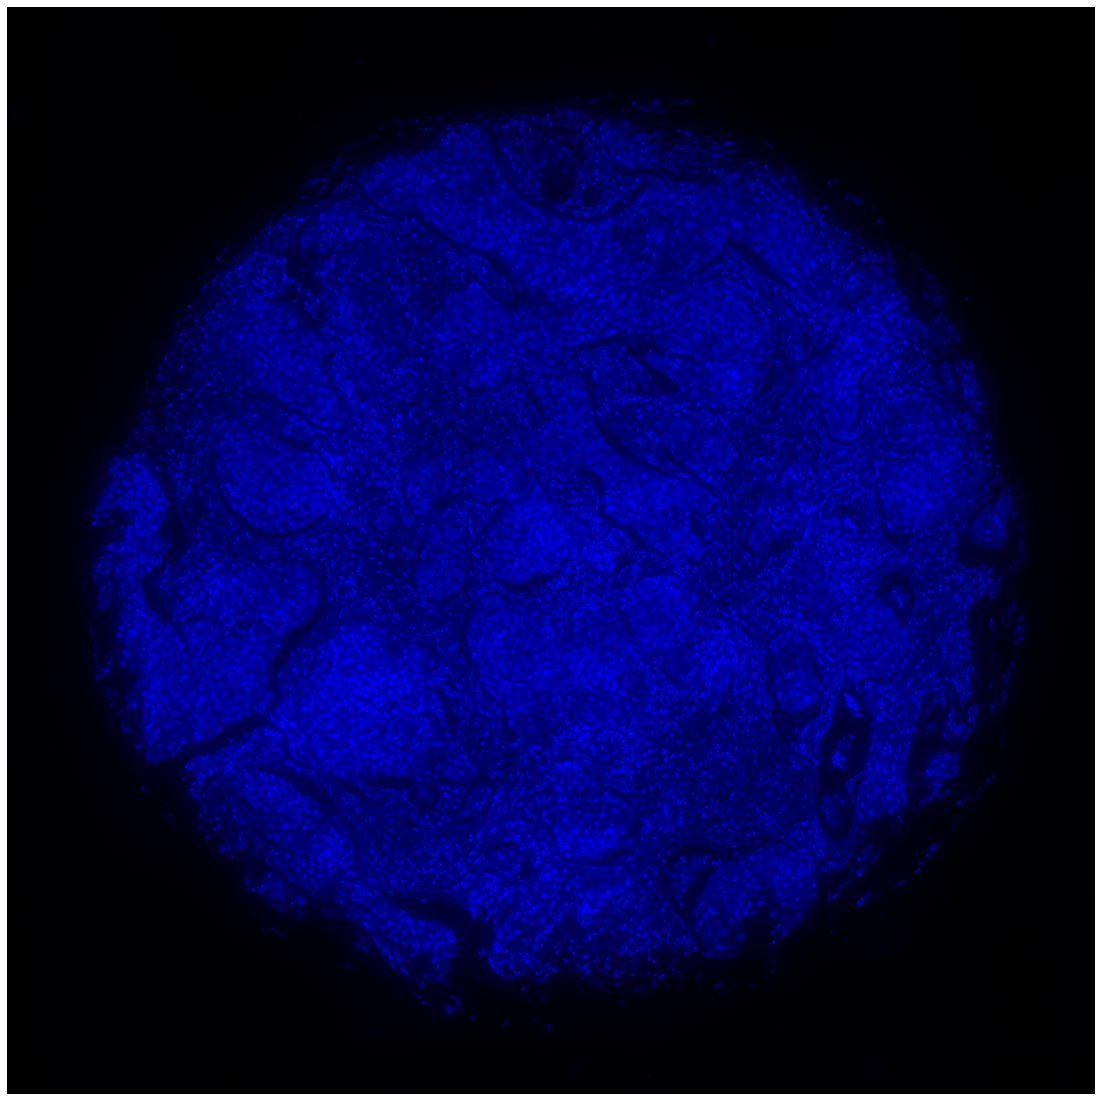

In [142]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(img_nuclei)
ax.axis('off')

In [143]:
from cellpose import models, plot, utils

use_GPU = models.use_gpu()
print(">>> GPU activated? %d" % use_GPU)

# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=use_GPU, model_type="nuclei")

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
# channels = [0,0]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# or if you have different types of channels in each image
channels = [0, 0]

masks_nuclei, _, _, _ = model.eval(
    img_nuclei[:,:,2], diameter=20, cellprob_threshold=-5.0, flow_threshold=4.0, channels=channels, resample=True
)

** TORCH CUDA version installed and working. **
>>> GPU activated? 1
** TORCH CUDA version installed and working. **
>>>> using GPU
processing 1 image(s)


C:\Users\thu71\.conda\envs\spatial_signaling\lib\site-packages\torch\nn\functional.py:3385: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20, 10))
ax[0].imshow(img_nuclei[:,:,2], cmap='gray')
ax[1].imshow(masks_nuclei, interpolation="None", cmap='jet')
ax[0].axis('off')
ax[1].axis('off')
fig.subplots_adjust(wspace=0.01)

# Expand to cytosol

In [ ]:
from scipy.ndimage import distance_transform_edt

def expand_labels(label_image, distance=1):
    distances, nearest_label_coords = distance_transform_edt(
        label_image == 0, return_indices=True
    )
    labels_out = np.zeros_like(label_image)
    dilate_mask = distances <= distance
    # build the coordinates to find nearest labels,
    # in contrast to [1] this implementation supports label arrays
    # of any dimension
    masked_nearest_label_coords = [
        dimension_indices[dilate_mask]
        for dimension_indices in nearest_label_coords
    ]
    nearest_labels = label_image[tuple(masked_nearest_label_coords)]
    labels_out[dilate_mask] = nearest_labels
    return labels_out

In [ ]:
mask = masks_nuclei
mask_cyto = expand_labels(mask,distance=5)

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(mask, cmap='jet', interpolation=None)
ax[0].axis('off')
ax[1].imshow(mask_cyto, cmap='jet', interpolation=None)
ax[1].axis('off')
fig.subplots_adjust(wspace=0.01)